[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana11/1_MultiArmedBandit_Exploracion_Explotacion.ipynb)

# Multi-Armed Bandit


#Bibliotecas y Funciones


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def entorno_multi_armed_bandit(maquinas):
    '''
    Creamos el entorno para el problema "multi_armed_bandit" generando aleatoriamente
    la distribución de probabilidad de los premios que otorga cada máquina
    '''
    medias = np.random.uniform(-5, 5, size=maquinas)
    std_ = np.random.uniform(0, 5, size=maquinas)
    return medias, std_

In [ ]:
def init_Q(maquinas):
  '''Inicializa el vector Q en ceros, el vector Q representa el valor esperado
   de recompensa de cada máquina'''
  Q =np.zeros(shape =(1, maquinas))
  return Q

## Estrategias para escoger máquinas

In [ ]:
def selecciona_maquina(maquinas):
    '''selecciona una máquina aleatoriamente con distribución unifome'''
    selec = np.random.choice(range(maquinas))
    return selec

In [ ]:
def selecciona_maquina_expl(Q):
    '''selecciona la maquina con el maximo valor de la ganancia esperada'''
    selec = np.argmax(Q[0])
    return selec

In [ ]:
def selecciona_maquina_egd(maquinas, epsilon):
    '''selecciona una con la estrategia epsilon decreasing greedy'''
    p = np.random.uniform(0,1)

    # cuándo epsilon es pequeño, se escoge la maquina con mayor ganancia
    if p < (1 - epsilon):
        selec = np.argmax(Q[0])
        return selec  

    # caso contrario, se escoge una al azar
    else: 
        selec = np.random.choice(range(maquinas))
        return selec

In [ ]:
def calcula_recompensa(selec):
  '''calcula la recompensa de jugar en una determinada máquina'''
  r = int(np.random.normal(medias[selec], std_[selec], 1))
  return r

In [ ]:
def actualiza_Q (Q, selec, r, veces_maq):
    '''actualiza el valor esperados de recompensa de la máquina seleccionada'''
    Q[0, selec] = Q[0, selec] + (r - Q[0, selec])/(veces_maq[selec])
    return Q

# Introducción

## Definimos nuestro entorno

In [ ]:
# Creamos el entorno definiendo el comportamiento de cada máquina

premio_medio  = np.array([0,  1,  5, -10])
desv_estandar = np.array([5, 0.1, 1,  1])

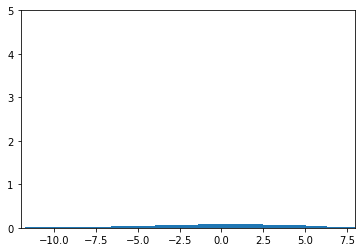

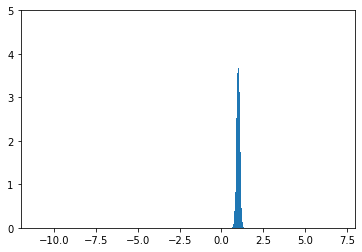

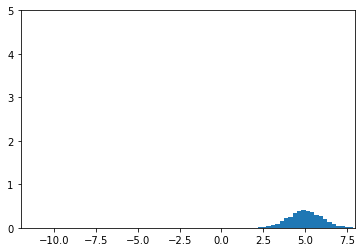

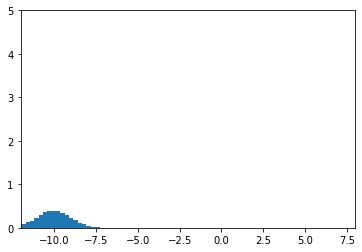

In [ ]:
# Veamos como se comportarian las máquinas tomando muestreos con dichas mediasy  desviaciones estándar
for maquina in range(4):

  s = np.random.normal(premio_medio[maquina], desv_estandar[maquina],10000)
  plt.xlim(-12,8)
  plt.ylim(0,5)
  plt.hist( s, bins=30,  density=True)
  plt.show()

## ¿Que hace un jugador en el casino?

* inicializamos en cero la variable que guardará los premios o perdidas acumuladas 

In [ ]:
ganado = 0

* seleccionamos una de las maquinas, se juega en ella y se obtiene la recompensa

In [ ]:
selec = 2
r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1))
ganado += r
print('recompensa(r):', r)
print('ganado:', ganado)

recompensa(r): 5
ganado: 50


##  ¿Cómo guardamos la información de los premios obtenidos de cada máquina?

In [ ]:
# Inicializa el vector Q en ceros, donde guardaremos la información
n_maquinas = 4 
Q = np.zeros(shape =(1, n_maquinas))
Q

array([[0., 0., 0., 0.]])

In [ ]:
# Vamos a jugar cierto número de veces (episodios)
episodios = 7
n_maquinas = 4
Q =np.zeros(shape =(1, n_maquinas))
ganado = 0

veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se ha jugado por máquina
for ep in range(1, episodios+1):
  selec = np.random.choice([0,1,2,3]) # selección aleatoria -> exploración
  veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina
  r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1))
  Q[0, selec] = Q[0, selec] + 1/(veces_maq[selec])*(r - Q[0, selec])
  ganado += r
  print('Episodio_{}, Máquina {}, Premio = {}, Premio_acum = {}, Q:{} \n'.format(ep,
                                                                   selec,
                                                                   r, 
                                                                   ganado,
                                                                   Q.round(2)))


Episodio_1, Máquina 3, Premio = -8, Premio_acum = -8, Q:[[ 0.  0.  0. -8.]] 

Episodio_2, Máquina 1, Premio = 1, Premio_acum = -7, Q:[[ 0.  1.  0. -8.]] 

Episodio_3, Máquina 0, Premio = -7, Premio_acum = -14, Q:[[-7.  1.  0. -8.]] 

Episodio_4, Máquina 1, Premio = 0, Premio_acum = -14, Q:[[-7.   0.5  0.  -8. ]] 

Episodio_5, Máquina 2, Premio = 4, Premio_acum = -10, Q:[[-7.   0.5  4.  -8. ]] 

Episodio_6, Máquina 1, Premio = 1, Premio_acum = -9, Q:[[-7.    0.67  4.   -8.  ]] 

Episodio_7, Máquina 1, Premio = 1, Premio_acum = -8, Q:[[-7.    0.75  4.   -8.  ]] 



¿Sería correcto si, en lugar de escojer la máquina de forma aleatoria, escojemos la que más rendimientos ha dado?

In [ ]:
Q[0]

array([-7.  ,  0.75,  4.  , -8.  ])

In [ ]:
selec = np.argmax(Q[0])  # selección usando la estrategia de explotación
selec

2

¿Podemos pensar en una estrategia combinada?

In [ ]:
p = np.random.uniform(0, 1)  # escojemos un valor entre 0 y 1
ε = .3 # valor que disminuye desde 1 hasta 0 según avance el aprendizaje
print(f'p = {p}, ε = {ε}')
print('¿p es menor que 1 - ε?', p < (1 - ε))
if p < (1 - ε):
    # Explotación
    print('explotación')
    selec = np.argmax(Q[0])
else: 
    # Exploración
    print('exploración')
    selec = np.random.choice(range(n_maquinas))
selec

p = 0.8048130529906304, ε = 0.3
¿p es menor que 1 - ε? False
exploración


3

Vamos a calcular  ε en función de los episodios, de manera decreciente


In [ ]:
episodios = 100
ε = np.exp(-5 * np.linspace(0, 1, episodios))
ε

array([1.        , 0.95074913, 0.9039239 , 0.85940486, 0.81707842,
       0.7768366 , 0.73857671, 0.70220117, 0.66761715, 0.63473642,
       0.6034751 , 0.57375342, 0.54549556, 0.51862943, 0.49308648,
       0.46880154, 0.44571265, 0.42376092, 0.40289032, 0.38304762,
       0.36418219, 0.3462459 , 0.32919299, 0.31297995, 0.29756541,
       0.28291005, 0.26897649, 0.25572916, 0.24313428, 0.2311597 ,
       0.21977488, 0.20895078, 0.19865977, 0.1888756 , 0.17957331,
       0.17072917, 0.16232061, 0.15432618, 0.14672548, 0.13949912,
       0.13262867, 0.12609659, 0.11988622, 0.11398172, 0.10836802,
       0.1030308 , 0.09795645, 0.09313201, 0.08854517, 0.08418425,
       0.0800381 , 0.07609615, 0.07234835, 0.06878513, 0.0653974 ,
       0.06217652, 0.05911428, 0.05620285, 0.05343481, 0.0508031 ,
       0.048301  , 0.04592213, 0.04366043, 0.04151011, 0.0394657 ,
       0.03752198, 0.03567399, 0.03391702, 0.03224658, 0.0306584 ,
       0.02914845, 0.02771286, 0.02634798, 0.02505032, 0.02381

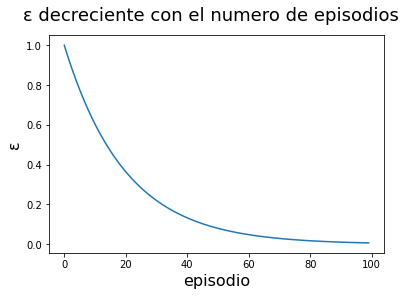

In [ ]:
fig =plt.figure()
plt.plot(ε)
plt.xlabel('episodio', fontsize=16)
plt.ylabel('ε', fontsize=16)
fig.suptitle('ε decreciente con el numero de episodios', fontsize=18)

plt.show()

# Aprendizaje con distintas estrategias

In [ ]:
### Definimos el número de máquinas o brazos del problema
n_maquinas = 3

### Creamos el entorno
np.random.seed(4)
medias, std_ = entorno_multi_armed_bandit(n_maquinas)  # inicializa la distribución de probabilidad de cada máquina

In [ ]:
### Definimos el número de episodios (juegos)
episodios = 1000

In [ ]:
medias

array([4.67029839, 0.47232249, 4.7268436 ])

In [ ]:
std_

array([3.57407997, 3.48864412, 1.08044748])

## Exploración

In [ ]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  
ganado = 0
veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se ha jugado por máquina

for i in range(n_maquinas):  # creamos un ciclo para jugar en cada máquina
    veces_maq[i] += 1               # actualizamos las veces que se ha jugado x máquina
    r = calcula_recompensa(i)
    Q = actualiza_Q(Q, i, r, veces_maq)
    ganado += r
    print(Q)


for episodio in range(n_maquinas+1,episodios+1):
    selec = selecciona_maquina(n_maquinas)
    veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina
    # Calcula el premio de esa acción
    r = calcula_recompensa(selec)
    # Actualiza la información de lo ganado por cada máquina
    Q = actualiza_Q(Q, selec, r, veces_maq)
  
    ganado += r
  
print("La ganancia total es de: ", ganado)

[[2. 0. 0.]]
[[2. 1. 0.]]
[[2. 1. 5.]]
La ganancia total es de:  3012


In [ ]:
veces_maq

array([327., 308., 365.])

In [ ]:
# Medias reales
medias

array([4.67029839, 0.47232249, 4.7268436 ])

In [ ]:
# Medias observadas
Q

array([[4.32110092, 0.27272727, 4.15068493]])

## Explotación

In [ ]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  
ganado = 0
veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se ha jugado por máquina
for i in range(n_maquinas):  # creamos un ciclo para jugar en cada máquina
    veces_maq[i] += 1               # actualizamos las veces que se ha jugado x máquina
    r = calcula_recompensa(i)
    Q = actualiza_Q(Q, i, r, veces_maq)
    ganado += r
    print(Q)
for episodio in range(n_maquinas+1 ,episodios+1): # el resto de los episodios los jugamos con una estrategia codiciosa
    selec = selecciona_maquina_expl(Q)
    veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina
    r = calcula_recompensa(selec)
    Q = actualiza_Q(Q, selec, r, veces_maq)
    ganado += r
    if episodio <15:
      print(Q)
print("La ganancia total es de: ", ganado)

[[5. 0. 0.]]
[[5. 2. 0.]]
[[5. 2. 6.]]
[[5.  2.  5.5]]
[[5.         2.         4.66666667]]
[[1.5        2.         4.66666667]]
[[1.5 2.  4.5]]
[[1.5 2.  4.2]]
[[1.5        2.         4.33333333]]
[[1.5        2.         4.14285714]]
[[1.5   2.    3.875]]
[[1.5 2.  4. ]]
[[1.5 2.  3.9]]
[[1.5        2.         3.90909091]]
La ganancia total es de:  4166


In [ ]:
veces_maq

array([  2.,   1., 997.])

In [ ]:
medias

array([4.67029839, 0.47232249, 4.7268436 ])

In [ ]:
Q

array([[1.5       , 2.        , 4.17352056]])

## Epsilon decreasing greedy

In [ ]:
# Comando para ver mejor números sin notación científica
np.set_printoptions(suppress=True)

epsilon = 0.1  # Si el "epsilon" definido abajo se comenta, queda el epsilon fijo

In [ ]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  
epsilon = np.exp(-5 * np.linspace(0, 1, episodios))  # creamos el vector con un epsilon para cada episodio (No afecta al ser modificado eb linea 16)
ganado = 0
veces_maq = np.zeros(n_maquinas)      # guardaremos las veces que se ha jugado por máquina

for i in range(n_maquinas):  # creamos un ciclo para jugar en cada máquina
    veces_maq[i] += 1               # actualizamos las veces que se ha jugado x máquina
    r = calcula_recompensa(i)
    Q = actualiza_Q(Q, i, r, veces_maq)
    ganado += r

for episodio in range(n_maquinas+1 ,episodios+1):
    # ADVERTENCIA: si comentan linea 15, se utilizara epsilon fijo igual a 0.1, si comentan la linea 17 se utilizará epsilon greedy
    eps = epsilon[episodio-1]  #epsilon decreciente

    #eps=0.1  # epsilon fijo

    selec = selecciona_maquina_egd(n_maquinas, eps)

    veces_maq[selec] += 1               # actualizamos las veces que se ha jugado x máquina
    r = calcula_recompensa(selec)
    Q = actualiza_Q(Q, selec, r, veces_maq)
    ganado += r

print("La ganancia total es de: ", ganado)

La ganancia total es de:  4230


In [ ]:
veces_maq

array([880.,  44.,  76.])

In [ ]:
medias

array([4.67029839, 0.47232249, 4.7268436 ])

In [ ]:
Q

array([[4.40568182, 0.84090909, 4.15789474]])

# Ejercicio


In [ ]:
import numpy as np

In [ ]:
# Hay una función para muestreo
np.random.choice([-1,9,99,999], size=1, replace=True, p=[0.8, 0.14, 0.05, 0.01])

# El primer parámetro es la lista de donde se obtendrán muestras
# size: Tamaño de la muestra
# replace: si se hace com reemplazo (pueden repetirse de los escogidos) o sin reemplazo
# p: probabilidades asignadas a cada uno de los elementos de la lista

array([-1])

Con la función anterior, cree el ambiente de las máquinas, ahora en lugar de una distribución normal, será una distribución discreta personalizada

En la lista que ingresan (la que arriba es [0, 10, 100, 1000]) pongan los valores de los premios que dará la máquina y en "p" pongan la probabilidad de que se gane el premio de la lista.

# Referencias:

[1]A. Aristizabal, «Understanding Reinforcement Learning Hands-On: Multi-Armed Bandits», Medium, oct. 19, 2020. https://towardsdatascience.com/understanding-reinforcement-learning-hands-on-part-2-multi-armed-bandits-526592072bdc (accedido jul. 30, 2021).

